## Preprocessing

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Export to prevent unnecessary queries
application_df.to_csv('Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts().reset_index()
application_type_counts

,APPLICATION_TYPE,count
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
bin_cutoff = 150
cutoff_labels = list(application_type_counts[application_type_counts["count"] < bin_cutoff]['APPLICATION_TYPE'])
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(lambda x: 'Other' if x in cutoff_labels else x)

# Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_type_counts = application_df['CLASSIFICATION'].value_counts().reset_index()
classification_type_counts

,CLASSIFICATION,count
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C4120,1
67,C8210,1
68,C2561,1
69,C4500,1


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
threshold = 1
cutoff_labels = list(classification_type_counts[classification_type_counts["count"] <= threshold]['CLASSIFICATION'])
application_df = application_df[~application_df['CLASSIFICATION'].isin(cutoff_labels)]

application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 1000
classifications_to_replace = list(classification_type_counts[classification_type_counts["count"] <= 1000]['CLASSIFICATION'])

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Look at feature types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34273 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34273 non-null  object
 1   AFFILIATION             34273 non-null  object
 2   CLASSIFICATION          34273 non-null  object
 3   USE_CASE                34273 non-null  object
 4   ORGANIZATION            34273 non-null  object
 5   STATUS                  34273 non-null  int64 
 6   INCOME_AMT              34273 non-null  object
 7   SPECIAL_CONSIDERATIONS  34273 non-null  object
 8   ASK_AMT                 34273 non-null  int64 
 9   IS_SUCCESSFUL           34273 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.9+ MB


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
obj_columns = application_df.select_dtypes(object).columns

application_df = pd.get_dummies(application_df, columns=obj_columns).astype(int)

In [12]:
# Check class balance
application_df['IS_SUCCESSFUL'].value_counts(normalize=True)

IS_SUCCESSFUL
1    0.532285
0    0.467715
Name: proportion, dtype: float64

In [13]:
# Split our preprocessed data into our features and target arrays
labels = application_df['IS_SUCCESSFUL']
features = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.2)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print('Shapes')
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)

Shapes
(27418, 44) (6855, 44)
(27418,) (6855,)


## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Given model complexity, maybe start of with 64, 32?
layer_1 = 8
layer_2 = 4

def build_nn():
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    
    tf.keras.backend.clear_session()
    nn_base = tf.keras.models.Sequential()
    nn_base.add(tf.keras.layers.InputLayer(input_shape=X_train_scaled.shape[1],))
# First hidden layer
    nn_base.add(tf.keras.layers.Dense(layer_1, activation='relu'))
# Second hidden layer
    nn_base.add(tf.keras.layers.Dense(layer_2, activation='relu'))
# Output layer
    nn_base.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    nn_base.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')
    return nn_base

# Check the structure of the model
nn = build_nn()
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 360       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
# Check above

In [17]:
# Train the model
import matplotlib.pyplot as plt

def train_nn_model(nn, X, y, Xt, yt):
    history = nn.fit(X, y, epochs=250, verbose=1, validation_data=(Xt, yt))
    return history


def plot_accuracy_loss(history):
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    fig.suptitle(f"FNN with {layer_1} & {layer_2} Neurons")
    ax[1].plot(history.history['accuracy'], label='accuracy')
    ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[1].set_title('Accuracy Metrics')
    ax[1].set_ylabel('Accuracy %')
    ax[1].set_xlabel('epoch')
    ax[1].legend(loc='best')
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_title('Loss Metrics')
    ax[0].set_ylabel('Loss %')
    ax[0].set_xlabel('epoch')
    ax[0].legend(loc='best')
    return fig

In [18]:
# Training Models
train_session_one = train_nn_model(nn, X_train_scaled, y_train, X_test_scaled, y_test)


Epoch 1/250
857/857 [==============================] - 1s 646us/step - loss: 0.6350 - accuracy: 0.6755 - val_loss: 0.5829 - val_accuracy: 0.7239
Epoch 2/250
857/857 [==============================] - 0s 498us/step - loss: 0.5777 - accuracy: 0.7178 - val_loss: 0.5641 - val_accuracy: 0.7313
Epoch 3/250
857/857 [==============================] - 0s 490us/step - loss: 0.5674 - accuracy: 0.7232 - val_loss: 0.5552 - val_accuracy: 0.7323
Epoch 4/250
857/857 [==============================] - 0s 505us/step - loss: 0.5615 - accuracy: 0.7247 - val_loss: 0.5502 - val_accuracy: 0.7344
Epoch 5/250
857/857 [==============================] - 0s 498us/step - loss: 0.5588 - accuracy: 0.7247 - val_loss: 0.5505 - val_accuracy: 0.7346
Epoch 6/250
857/857 [==============================] - 0s 516us/step - loss: 0.5572 - accuracy: 0.7254 - val_loss: 0.5483 - val_accuracy: 0.7367
Epoch 7/250
857/857 [==============================] - 0s 500us/step - loss: 0.5561 - accuracy: 0.7256 - val_loss: 0.5486 - val_ac

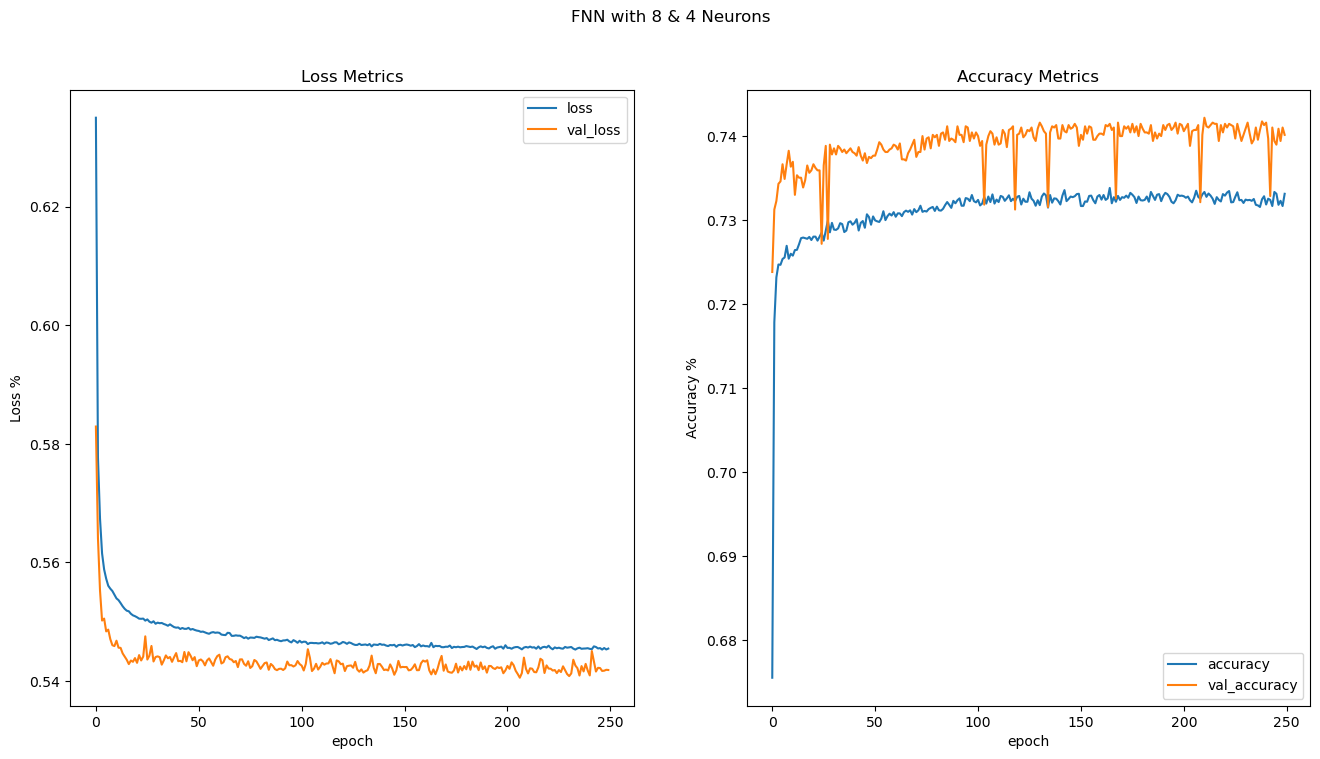

In [19]:
fig = plot_accuracy_loss(train_session_one)


In [20]:
fig.savefig(f'Images/model_1_metrics/feed_forward_model1_{layer_1}_{layer_2}.png')

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5418 - accuracy: 0.7402 - 85ms/epoch - 393us/step
Loss: 0.541832447052002, Accuracy: 0.7401896715164185


In [188]:
# Export our model to HDF5 file
nn_directory = "Models/AlphabetSoupCharity_m1.h5"
# Save the model to a HDF5 file
nn.save(nn_directory)

# Summary

In this first model, I split the dataset 80-20 for training and validation. 

I initially used 32-16 for my hidden layers but it looked like the data overfit based on the curves. I then reduced it to 8 and 4 with no dropout with e=100. I then got 74% accuracy on training data with 54 loss ratio. validation_loss curve below the training_loss curve shows the model struggling to fit model data. Should probably use a different random state or different split to train.